**Context:**
> Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

**Objective:**
> To implement the techniques learnt as a part of the course.

**Learning Outcomes:**
*  Pre-processing of image data.
*  Visualization of images.
*  Building CNN.
*  Evaluate the Model.
*  The motive of the project is to make the learners capable to handle images/image classification problems, during this process you shouldalso be capable to handle real image files, not just limited to a numpy array of image pixels.

**Guide to solve the project seamlessly:**
> Here are the points which will help you to solve the problem efficiently:
*   Read  the  problem  statement  carefully  from start  to  end  (including  the  note  at  the  end).  The  highlighted  part  in  the attached problem statement should not be missed.
*   Download the dataset from the Olympus platform.
*  Upload the "images.npy"and “Labels.csv” file to google drive.
*   Then  you  can  use  the  dataset  path  in  the  Google  Colab  notebook  to  do  further  steps  related  to  project  problem statement.
*   You can set runtime type to “GPU” in Google Colab, so that the code will run fasteras you will be using CNN to fit your model.

**Steps and tasks:**

   `1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. **(5 Marks)**
    2. Data Pre-processing: **(15 Marks)**
         a.Normalization.
         b.Gaussian Blurring.
         c.Visualize data after pre-processing.
    3.Make data compatible: **(10 Marks)**
         a.Convert labelsto one-hot-vectors.
         b.Print the label for y_train[0].
         c.Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
         d.Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
   
    4.Building CNN: **(15 Marks)**
         a.Define layers.
         b.Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
   
    5.Fit and evaluate modeland print confusion matrix. **(10 Marks)**
   
    6.Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. **(5 Marks)**

**Note:**
1.   Download the train images from theOlympus Platform.
2.   Do not download the dataset from Kaggle, as:
         a. The dataset is big.
         b. The dataset has 2 files for train and test images, but the labels are only for the train file. 
         c. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to youon Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose



In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. **(5 Marks)**

In [1]:
import math
import pandas as pd
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
#from google.colab import drive

In [2]:
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#images = np.load('/content/drive/MyDrive/PGP-AIML/Project 7/images.npy')
images = np.load('images.npy')

In [3]:
print ('Images:  ', images)

Images:   [[[[ 35  52  78]
   [ 36  49  76]
   [ 31  45  69]
   ...
   [ 78  95 114]
   [ 76  93 110]
   [ 80  95 109]]

  [[ 33  46  68]
   [ 37  50  73]
   [ 48  65  83]
   ...
   [ 81  96 113]
   [ 74  89 105]
   [ 83  95 109]]

  [[ 34  50  68]
   [ 35  52  72]
   [ 70  85 101]
   ...
   [ 83  97 112]
   [ 79  94 108]
   [ 79  94 107]]

  ...

  [[ 35  50  69]
   [ 42  57  73]
   [ 42  57  72]
   ...
   [ 60  76  92]
   [ 67  81  97]
   [ 64  77  95]]

  [[ 36  52  67]
   [ 48  63  78]
   [ 41  57  73]
   ...
   [ 44  66  83]
   [ 58  76  91]
   [ 57  74  90]]

  [[ 44  58  70]
   [ 43  57  73]
   [ 40  55  72]
   ...
   [ 41  70  92]
   [ 55  78  97]
   [ 61  79  96]]]


 [[[ 30  47  63]
   [ 30  50  60]
   [ 34  47  63]
   ...
   [ 48  59  74]
   [ 42  54  69]
   [ 44  56  70]]

  [[ 30  49  67]
   [ 26  47  60]
   [ 30  40  61]
   ...
   [ 50  64  76]
   [ 52  67  78]
   [ 45  56  72]]

  [[ 23  46  65]
   [ 27  48  64]
   [ 25  40  59]
   ...
   [ 39  59  81]
   [ 47  62  79]
 

In [5]:
print(images.size)

233472000


In [4]:
print(images.shape)

(4750, 128, 128, 3)


In [5]:
#data = pd.read_csv('/content/drive/MyDrive/PGP-AIML/Project 7/Labels.csv')
data = pd.read_csv('Labels.csv')

In [6]:
print(data.size)

4750


In [7]:
data.nunique()

Label    12
dtype: int64

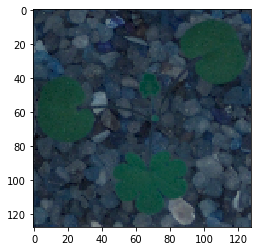

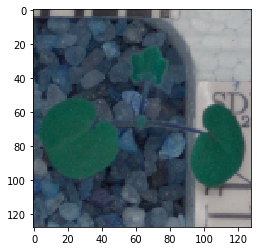

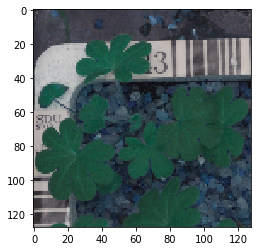

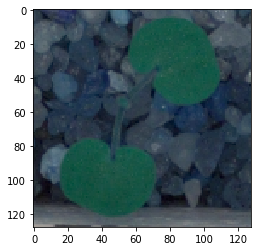

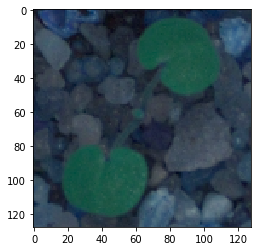

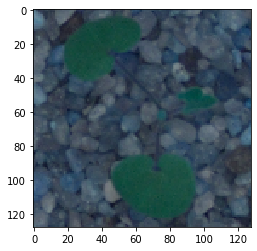

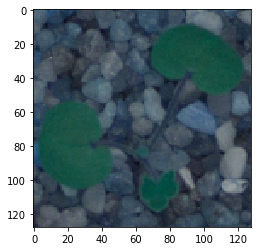

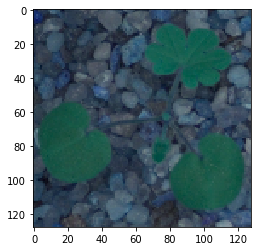

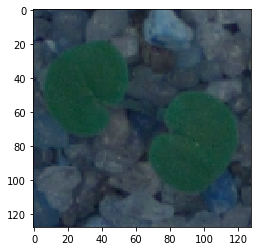

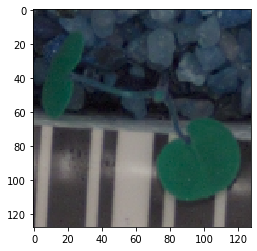

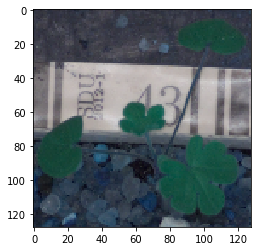

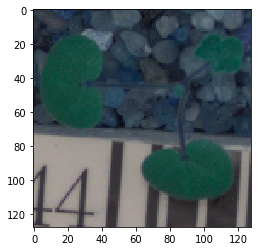

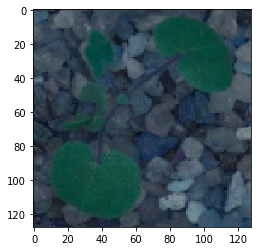

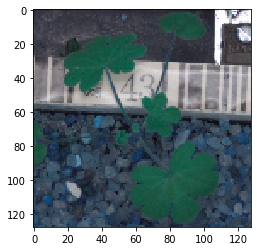

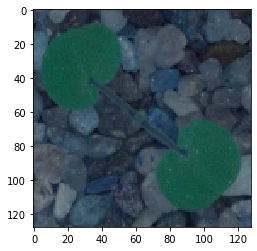

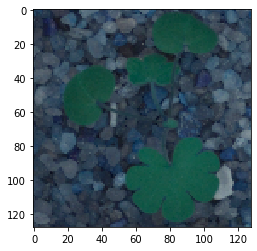

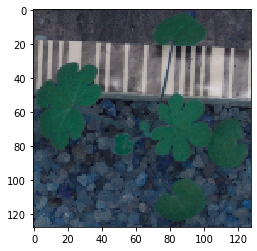

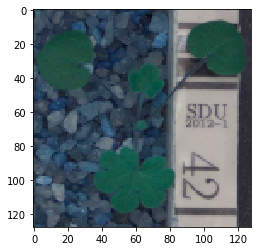

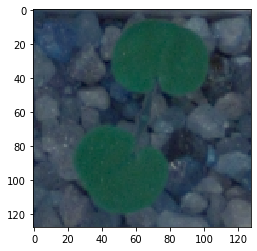

In [28]:
for img in images[1:20]:
    plt.figure()
    plt.imshow(img)

2. Data Pre-processing: **(15 Marks)**
         a.Normalization.
         b.Gaussian Blurring.
         c.Visualize data after pre-processing.

In [8]:
images = images.astype('float32')

# It is better to add a Normalization layer to the model instead of scaling the data just once
images /= 255

In [9]:
print(images.shape)

(4750, 128, 128, 3)


In [10]:
import skimage
import cv2

# apply Gaussian blur, creating a new image
blurred_images = []
for img in images:
  blurred_img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
  if img is None or img.shape != (128, 128, 3):
      print(f'This image is bad: {myFile} {img.shape if img is not None else "None"}')
  else:
      blurred_images.append(blurred_img)

In [11]:
print(np.array(blurred_images).shape)

(4750, 128, 128, 3)


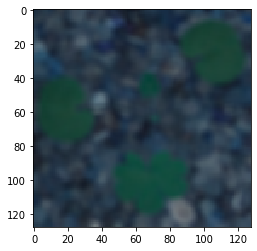

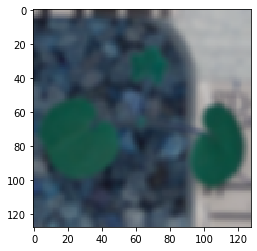

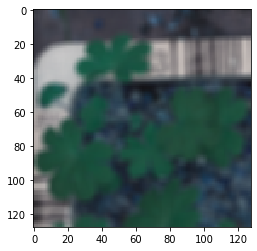

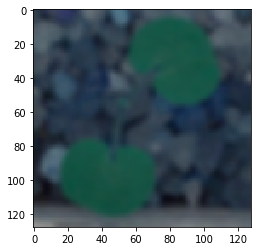

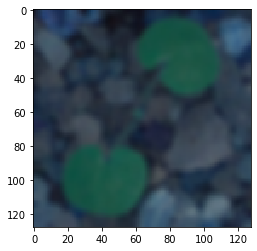

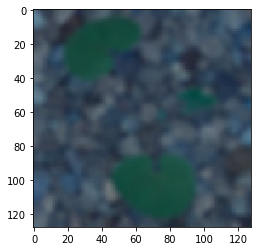

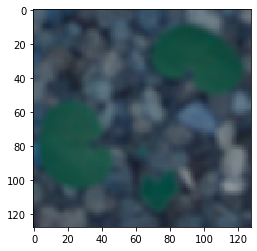

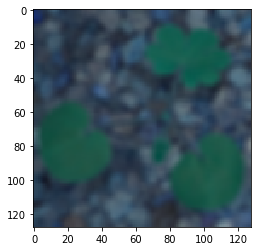

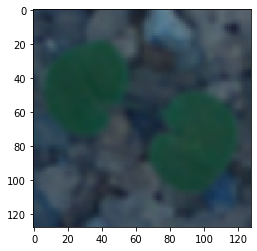

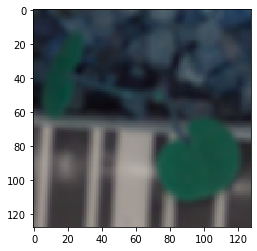

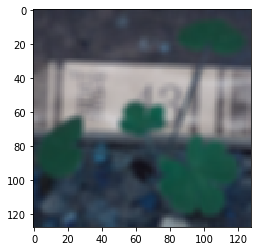

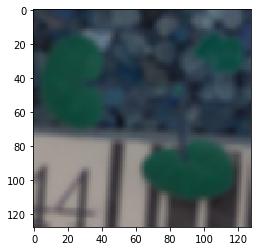

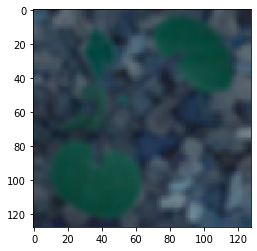

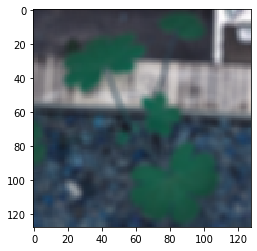

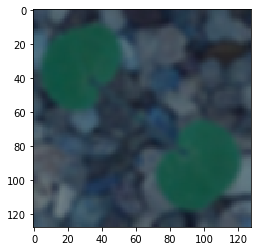

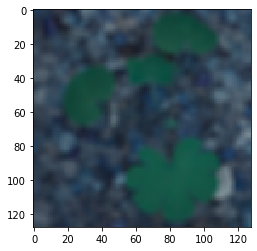

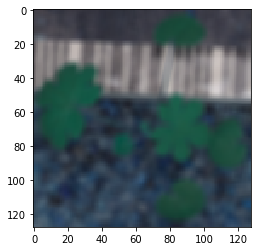

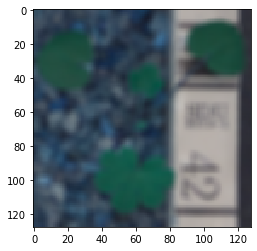

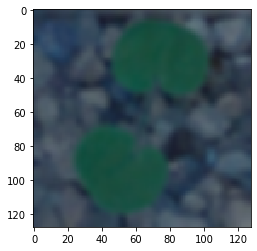

In [29]:
for blur in blurred_images[1:20]:
      plt.figure()
      plt.imshow(blur)

3.Make data compatible: **(10 Marks)**
*  Convert labels to one-hot-vectors.
*  Print the label for y_train[0].
*  Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
*  Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape

In [12]:
x_train, x_test, y_train, y_test = train_test_split(np.array(blurred_images), data, test_size=0.3, random_state=1)

In [13]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

#Dropout layer in CNN
#Transfer learning

In [14]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


4.Building CNN: **(15 Marks)**
*   Define layers.
*   Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)



In [16]:
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras import layers

model = Sequential()
#model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu"))
model.add(layers.MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

5.Fit and evaluate model and print confusion matrix. **(10 Marks)**

In [17]:
# Fit the model
model.fit( x=x_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.5)

Epoch 1/10
52/52 [==============================] - 32s 591ms/step - loss: 2.4627 - accuracy: 0.1899 - val_loss: 1.9088 - val_accuracy: 0.3524
Epoch 2/10
52/52 [==============================] - 30s 574ms/step - loss: 1.7330 - accuracy: 0.3931 - val_loss: 1.6246 - val_accuracy: 0.4317
Epoch 3/10
52/52 [==============================] - 29s 555ms/step - loss: 1.3985 - accuracy: 0.5348 - val_loss: 1.5292 - val_accuracy: 0.4666
Epoch 4/10
52/52 [==============================] - 29s 559ms/step - loss: 1.1988 - accuracy: 0.5868 - val_loss: 1.3047 - val_accuracy: 0.5767
Epoch 5/10
52/52 [==============================] - 29s 556ms/step - loss: 0.8965 - accuracy: 0.7067 - val_loss: 1.2390 - val_accuracy: 0.5887
Epoch 6/10
52/52 [==============================] - 30s 586ms/step - loss: 0.7701 - accuracy: 0.7344 - val_loss: 1.1941 - val_accuracy: 0.6115
Epoch 7/10
52/52 [==============================] - 29s 557ms/step - loss: 0.5883 - accuracy: 0.8066 - val_loss: 1.2045 - val_accuracy: 0.6338

In [18]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Loss Score:", score[0])
print("Test Accuracy:", score[1])

45/45 [==============================] - 5s 121ms/step - loss: 1.5674 - accuracy: 0.5951
Test Loss Score: 1.5673832893371582
Test Accuracy: 0.5950877070426941


In [19]:
y_predict = np.round(model.predict(x_test))

In [20]:
y_predict.shape

(1425, 12)

In [21]:
y_test.shape

(1425, 12)

In [22]:
from tensorflow.keras import metrics


In [23]:
m0 = tf.keras.metrics.Accuracy()
m0.update_state(y_test, y_predict)
print("Training accuracy",0.93)  
print("Testing Accuracy:", m0.result().numpy()) 


Training accuracy 0.93
Testing Accuracy: 0.9352047


In [24]:
print('Confusion Matrix')

# Print the confusion matrix
print(confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1)))
print()
print()
# Print the precision and recall, among other metrics
print(classification_report(y_test, y_predict, digits=3))


Confusion Matrix
[[ 21   0   0   0   5   3  60   1   2   0   0   2]
 [  6  75   9   0   1   1   0   1   2   1   5   4]
 [ 15   7  36   2   0   1   0   1  10   0   5   3]
 [ 10   0   0 137   0   0   0  23   3   1   6   1]
 [ 18   0   1   0  13   1  24   0   5   0   0   1]
 [ 30   3   1  10   3  53   8   4   8   4   8  10]
 [ 30   0   1   1   6   1 145   0   2   0   1   2]
 [  5   1   0  11   0   1   0  39   4   0   3   3]
 [ 19   2   4   9   1   4   2  11  88   1   1   8]
 [  6   1   1  12   0   0   0  14  17   9  11   0]
 [  5   0   0   1   0   2   0   6   2   7 128   4]
 [ 22   2   0   5   1  20   1   4  12   1   3  57]]


              precision    recall  f1-score   support

           0      0.381     0.085     0.139        94
           1      0.824     0.714     0.765       105
           2      0.679     0.450     0.541        80
           3      0.729     0.757     0.743       181
           4      0.433     0.206     0.280        63
           5      0.609     0.373     0.463

C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6.Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. **(5 Marks)**

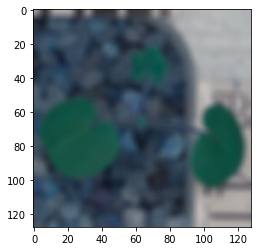

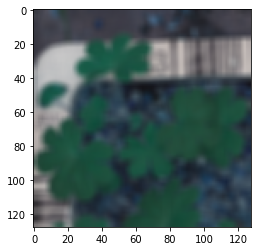

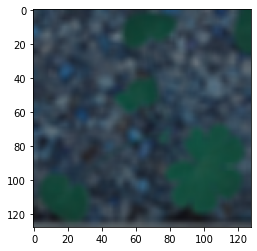

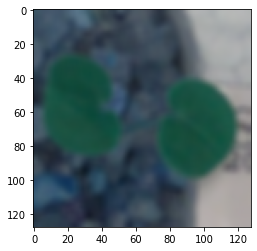

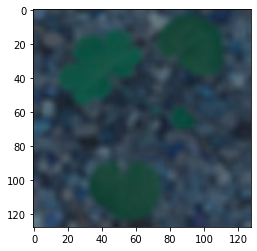

In [58]:
for img in blurred_images[2], blurred_images[3], blurred_images[33],blurred_images[36], blurred_images[59]:
  plt.figure()
  plt.imshow(img)

In [25]:
print (y_predict[2], y_predict[3], y_predict[33], y_predict[36], y_predict[59])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
print (y_test[2], y_test[3], y_test[33], y_test[36], y_test[59])

[0 0 0 0 0 0 0 0 1 0 0 0] [0 0 0 1 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 1 0 0]
